In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import adfuller, kpss
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.stats.diagnostic import acorr_ljungbox
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import pmdarima as pm
from statsmodels.tsa.holtwinters import ExponentialSmoothing
import warnings

warnings.filterwarnings('ignore')


In [2]:
df_ = pd.read_excel("project data.xlsx", 'Sheet2')
df  = df_.dropna()
# Parsing 'PurchaseDate' as datetime and setting it as the index
df['PurchaseDate'] = pd.to_datetime(df['PurchaseDate'])
df.set_index('PurchaseDate', inplace=True)

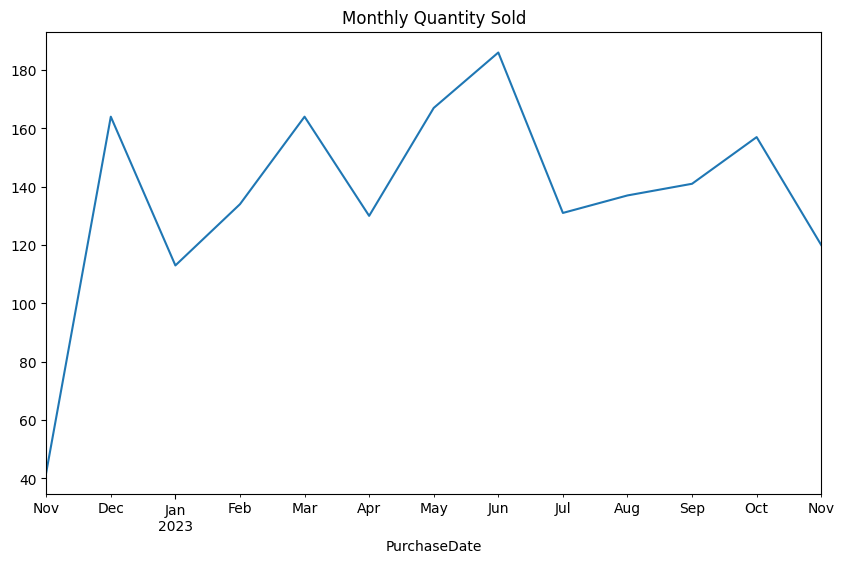

In [3]:
# Focusing on a column for time series analysis, e.g., 'Quantity'
time_series_data = df['Quantity'].resample('M').sum()

# Displaying basic time series plot
plt.figure(figsize=(10, 6))
time_series_data.plot(title='Monthly Quantity Sold')
plt.show()

In [4]:
# Shorter Moving Average
short_ma_window = 4
time_series_short_ma = time_series_data.rolling(window=short_ma_window, min_periods=1).mean()

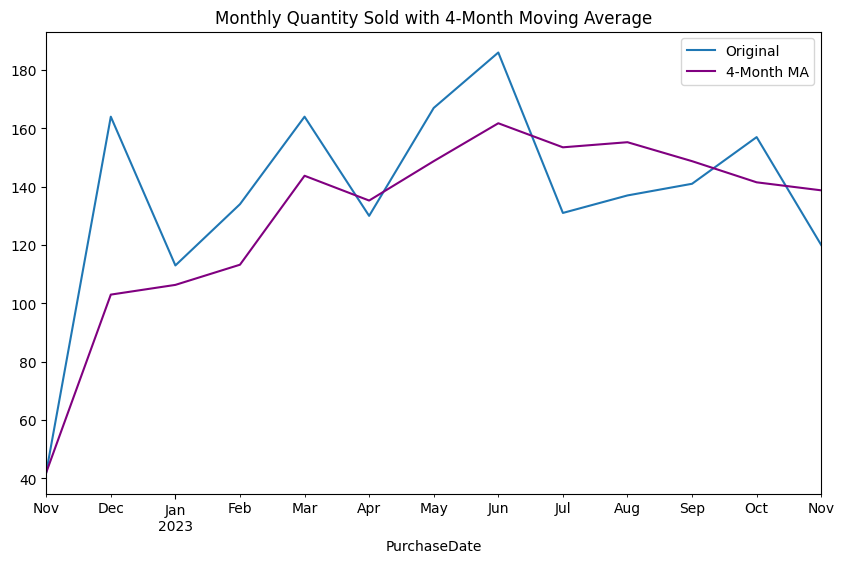

In [5]:
# Displaying Short MA plot
plt.figure(figsize=(10, 6))
time_series_data.plot(label='Original')
time_series_short_ma.plot(label=f'{short_ma_window}-Month MA', color='purple')
plt.title(f'Monthly Quantity Sold with {short_ma_window}-Month Moving Average')
plt.legend()
plt.show()

In [6]:
# Applying Exponential Weighted Moving Average (EWMA)
ewma_span = 12  # Span for EWMA
time_series_ewma = time_series_data.ewm(span=ewma_span, adjust=False).mean()

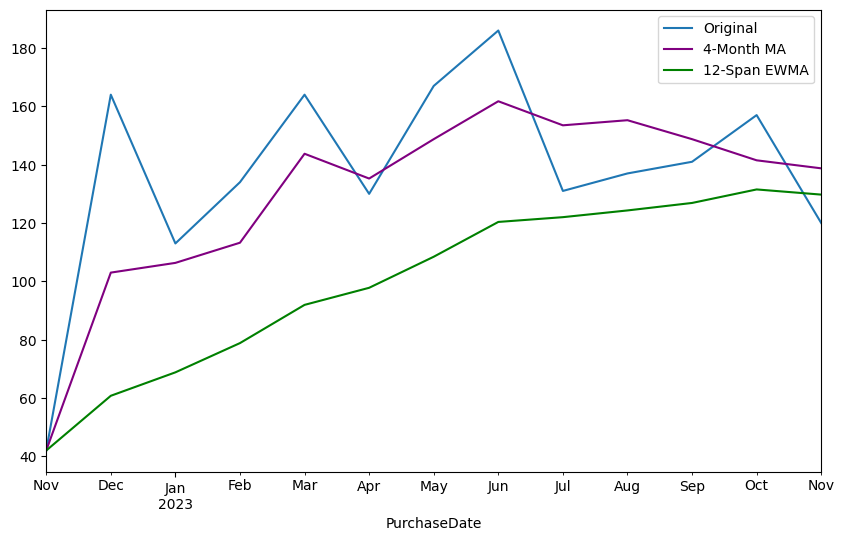

In [7]:
plt.figure(figsize=(10, 6))
time_series_data.plot(label='Original')
time_series_short_ma.plot(label=f'{short_ma_window}-Month MA', color='purple')
time_series_ewma.plot(label=f'{ewma_span}-Span EWMA', color='green')

plt.legend()

plt.show()